In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "TFM/code/entanglement_2x2/input_data/received_from_DM/pure_states"

df1 = pd.read_csv(path+"/entangled_1.txt", sep='\s+', header = None)
df2 = pd.read_csv(path+"/separable.txt", sep='\s+', header = None)
df1["entangled"]= 1
df2["entangled"]= 0


In [3]:
df = pd.concat([df1, df2])
df = df.sample(frac=1, ignore_index=True, random_state=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,entangled
0,0.120565,0.0,-0.008910,-0.016734,0.312781,-0.072717,-0.033207,-0.038040,-0.008910,0.016734,...,-0.118717,-0.033207,0.038040,0.007734,0.001798,-0.063206,0.118717,0.021149,0.0,0
1,0.911162,0.0,-0.057778,0.126487,0.039758,-0.242127,0.031091,0.020873,-0.057778,-0.126487,...,0.009173,0.031091,-0.020873,0.000926,0.005640,-0.004190,-0.009173,0.001539,0.0,0
2,0.200093,0.0,0.215727,-0.116066,-0.241033,-0.043729,0.190302,-0.061827,0.215727,0.116066,...,0.116066,0.190302,0.061827,0.241033,-0.043729,-0.215727,-0.116066,0.200093,0.0,1
3,0.000912,0.0,0.002687,-0.006999,0.003503,-0.000447,0.006890,-0.028197,0.002687,0.006999,...,-0.104909,0.006890,0.028197,0.236692,0.030203,0.040280,0.104909,0.923785,0.0,0
4,0.138334,0.0,-0.209380,-0.078681,0.174392,0.140065,0.070490,0.119027,-0.209380,0.078681,...,0.078681,0.070490,-0.119027,-0.174392,0.140065,0.209380,-0.078681,0.138334,0.0,1


In [4]:
import joblib
joblib.dump(df, "pure.job")

['pure.job']

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,entangled
count,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,0.246100,0.0,0.001743,0.001047,0.000102,-0.001969,-0.000755,0.000439,0.001743,-0.001047,...,0.000043,-0.000755,-0.000439,-0.000356,0.000090,0.000599,-0.000043,0.249727,0.0,0.500000
std,0.224394,0.0,0.145413,0.145777,0.146636,0.145910,0.157832,0.158377,0.145413,0.145777,...,0.146966,0.157832,0.158377,0.146704,0.147392,0.146688,0.146966,0.225864,0.0,0.500013
min,0.000000,0.0,-0.497184,-0.490157,-0.496877,-0.499266,-0.499490,-0.496988,-0.497184,-0.496243,...,-0.496753,-0.499490,-0.499888,-0.498750,-0.499369,-0.494866,-0.495086,0.000000,0.0,0.000000
25%,0.052135,0.0,-0.086143,-0.088310,-0.089925,-0.091487,-0.071898,-0.071634,-0.086143,-0.089637,...,-0.090511,-0.071898,-0.072300,-0.090664,-0.089627,-0.090328,-0.090726,0.054308,0.0,0.000000
50%,0.196757,0.0,0.000036,0.000009,-0.000044,-0.000094,-0.000005,0.000348,0.000036,-0.000009,...,-0.000005,-0.000005,-0.000348,0.000032,0.000010,-0.000002,0.000005,0.199980,0.0,0.500000
75%,0.389116,0.0,0.089998,0.089637,0.090522,0.087847,0.072620,0.072300,0.089998,0.088310,...,0.090726,0.072620,0.071634,0.089575,0.089605,0.090533,0.090511,0.394089,0.0,1.000000
max,0.999846,0.0,0.495507,0.496243,0.494666,0.497415,0.494738,0.499888,0.495507,0.490157,...,0.495086,0.494738,0.496988,0.494774,0.495374,0.498618,0.496753,0.999751,0.0,1.000000


## Random Forest 
### Raw data

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier(random_state=1)

X = df.drop(columns="entangled")
y = df['entangled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.99925

In [6]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.9995 , 0.9995 , 0.99925, 0.99925, 0.99825])

<AxesSubplot:>

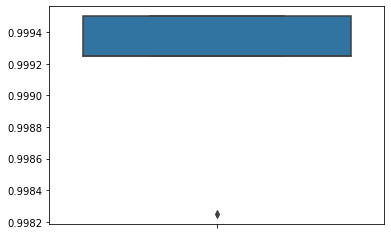

In [7]:
import seaborn as sns
sns.boxplot(y = scores)

### Dimensionality reduction

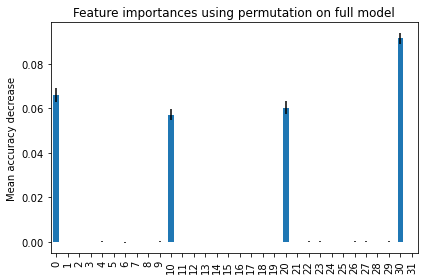

In [8]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances = pd.Series(result.importances_mean)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [9]:
most_important = forest_importances.sort_values(ascending=False)[0:4].index
reduced_df = df[most_important]

In [10]:
reduced_df

,30,0,20,10
0,0.021149,0.120565,0.855305,0.002981
1,0.001539,0.911162,0.066076,0.021223
2,0.200093,0.200093,0.299907,0.299907
3,0.923785,0.000912,0.013670,0.061633
4,0.138334,0.138334,0.361666,0.361666
...,...,...,...,...
19995,0.164082,0.003969,0.000784,0.831165
19996,0.000033,0.711332,0.288554,0.000081
19997,0.420337,0.420337,0.079663,0.079663
19998,0.229846,0.264076,0.195318,0.310759


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier(random_state=1)

X = reduced_df
y = df['entangled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [12]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


1.0

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.99975, 0.99975, 1.     , 1.     , 0.99975])

<AxesSubplot:>

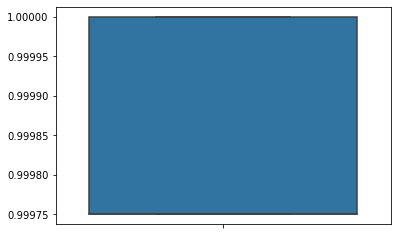

In [14]:
import seaborn as sns
sns.boxplot(y = scores)